# Aula 5 - Exercícios - Gráficos
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [15]:
# Importe a biblioteca pandas
import pandas as pd
import seaborn as sns
sns.set() # Ajusta valor padrão de tema, escala e paleta de cor


### 5.4 Plote um gráfico boxplot da coluna Valor_total de 5 municípios do dataset de Morbidade do Datasus. Os municípios a serem plotados são aqueles que obtiveram o maior custo médio diário de internação em todo o brasil. 
#### Esta métrica de custo médio diário de internação foi calculada no exercício 4.5 e 4.6. Use um argumento aspect=2 para o gráfico não sobrepor os nomes das cidades.


#### Dica: Antes de tentar plotar o gráfico, escreva algumas sentenças de código usando operações do pandas para encontrar quais são esses 5 municípios.
#### path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'


In [23]:
# YOUR CODE HERE
# Plote aqui seu gráfico
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'

col_types = {
    "Município": "string",
    "Internações": pd.Int64Dtype(),
    "AIH_aprovadas": "int",
    "Valor_total": "float",
    "Valor_serviços_hospitalares": "float",
    "Dias_permanência": pd.Int64Dtype(),
    "Val_serv_prof_-_compl_federal": "float",
    "Val_serv_prof_-_compl_gestor":"float",
    "Valor_médio_AIH":"float"}

df_morbidade = pd.read_csv(path_morbidade, sep=";", decimal=",", na_values="-",dtype=col_types,low_memory=False)

#df_morbidade["custo_medio"] = df_morbidade["Valor_total"]/df_morbidade["Dias_permanência"]

# Getting the cities with the highest mediu_values
#cities_codes = df_morbidade.sort_values(by=["custo_medio"], ascending=False).iloc[0:5,:]["cod_ibge6"]
#cities_codes
#df_morbidade

# Medium of the sum of all valor_total and all dias_permanência.
grouped = df_morbidade.groupby(["cod_ibge6"])[["Valor_total", "Dias_permanência"]].sum()
grouped["media_diaria"] = grouped["Valor_total"]/grouped["Dias_permanência"]
mu = grouped.sort_values(by=["media_diaria"], ascending=False).iloc[0:5,:]
cities_codes = mu.index

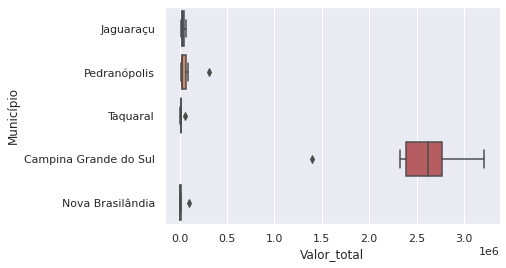

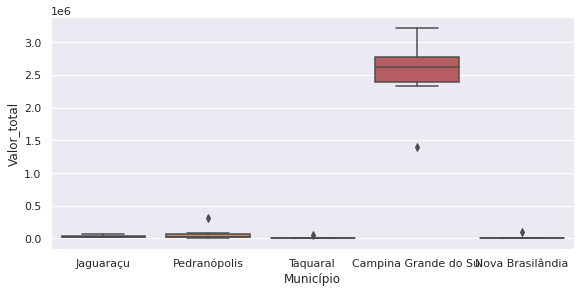

In [24]:
# Filtering dataFrame morbidade with the five selected cities
df_morbidade = df_morbidade[df_morbidade["cod_ibge6"].isin(cities_codes.values)]
    
sns.boxplot(x="Valor_total", y="Município" ,data=df_morbidade)    

sns.catplot(
    x="Município", 
    y="Valor_total",
    kind="box",
    height=4, 
    aspect=2,
    data=df_morbidade
)
